In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

def prepare_data(filename, sheetname):
    return pd.read_excel(filename, sheetname).drop(index=0).reset_index(drop=True).replace(',','', regex=True).applymap(float)

def read_docx_table(document,table_num=1,nheader=1, transpose=True, check=True):
    

    table = document.tables[table_num-1]
    data = [[cell.text for cell in row.cells] for row in table.rows]
    df = pd.DataFrame(data)
    if nheader == 1:
        df = df.rename(columns=df.iloc[0]).drop(df.index[0]).reset_index(drop=True)
    elif nheader == 2:
        outside_col, inside_col = df.iloc[0], df.iloc[1]
        hier_index = pd.MultiIndex.from_tuples(list(zip(outside_col,inside_col)))
        df = pd.DataFrame(data,columns=hier_index).drop(df.index[[0,1]]).reset_index(drop=True) 
    elif nheader > 2:
        print("More than two headers not currently supported")
        df = pd.DataFrame()
    return df.reset_index(drop=True).transpose().reset_index() if transpose else df

def get_reology_data(doc):
    df = read_docx_table(doc,table_num=3,nheader=2,transpose=0)
    df = df.iloc[:,:5]
    df.columns = ['Temp', "Pressure", "Density", "Drop", "Plastic visc"]
    df.drop(columns=['Drop'], inplace=True)
    return df
data = prepare_data(r"C:\Users\defau\ML PROJECT DIPLOMA\Данные 3\Жанаталап 280\WellPlan_Rep_215.9_Жанаталап_280.xlsx", "Мин расход по глубине")

data
X = list(data['Расстояние вдоль колонны'].drop(labels=data.index[0]))
y = list(data['Мин. расход'].drop(labels=data.index[0]))

# X



# plt.gca().invert_yaxis()
# plt.plot(X, y)

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.8)
X_train

# model = DecisionTreeClassifier()
# model.fit(X_train, y_train)

# # predictions = model.predict(X_test)


# X_train

[274.32, 630.0, 304.8, 30.48]

# Polynomial Regression


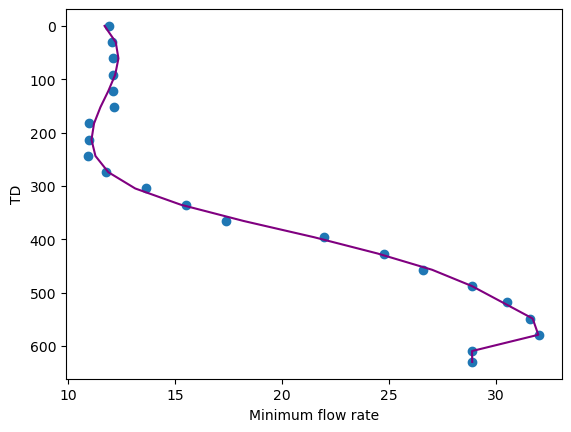

In [2]:
from sklearn.preprocessing import PolynomialFeatures

data1 = prepare_data(r"C:\Users\defau\ML PROJECT DIPLOMA\Данные 3\Жанаталап 280\WellPlan_Rep_215.9_Жанаталап_280.xlsx", "Мин расход по глубине")

# data1
X = data1[['Расстояние вдоль колонны','Глубина по вертикали']]

y = data1['Мин. расход']



poly = PolynomialFeatures(degree=3
                          , include_bias=False)

poly_features = poly.fit_transform(X)


#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)

#use model to make predictions on response variable
y_predicted = poly_reg_model.predict(poly_features)

#create scatterplot of x vs. y
plt.scatter(y, X["Расстояние вдоль колонны"])

#add line to show fitted polynomial regression model
plt.plot(y_predicted, X["Расстояние вдоль колонны"], color='purple')
plt.gca().set_ylabel("TD")
plt.gca().set_xlabel("Minimum flow rate")
plt.gca().invert_yaxis()


# Снизу я попытался к уже созданной модели дать похожие по размеру данные. В конечном итоге модель просто перетренировалась на новые данные.

In [183]:
data2 = prepare_data(r"C:\Users\defau\ML PROJECT DIPLOMA\Данные 3\Жанаталап 281\WellPlan_Rep_215.9_Жанаталап_281.xlsx", "Мин расход по глубине")
Depth2 = data2[['Расстояние вдоль колонны','Глубина по вертикали']]
flow2 = data2['Мин. расход']

In [184]:
poly_features = poly.fit_transform(Depth2)

In [185]:
poly_reg_model.fit(poly_features, flow2)

LinearRegression()

In [186]:
y_predicted = poly_reg_model.predict(poly_features)

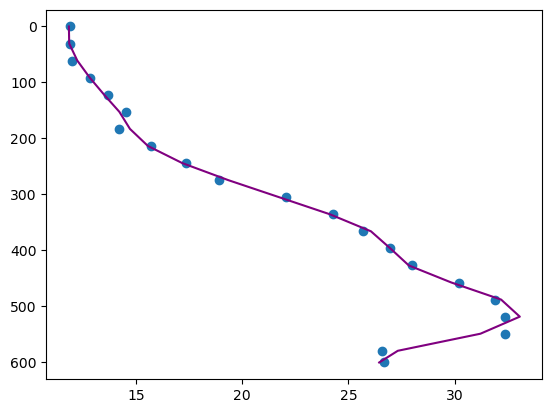

In [187]:
plt.scatter(flow2, Depth2["Расстояние вдоль колонны"])

#add line to show fitted polynomial regression model
plt.plot(y_predicted, Depth2["Расстояние вдоль колонны"], color='purple')
plt.gca().invert_yaxis()

# Разбиение на обучающий и тестовый наборы данных - Train | Test Split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [147]:
model = LinearRegression(fit_intercept=True)

In [148]:
model.fit(X_train,y_train)

LinearRegression()

In [149]:
test_predictions = model.predict(X_test)

In [150]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [151]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [152]:
MAE

0.5005347199001705

In [153]:
MSE

0.5981855554639253

In [154]:
RMSE

0.7734245635250572

In [155]:
# Ошибка на обучающем наборе для той или иной степени полинома
train_rmse_errors = []
# Ошибка на тестовом наборе для той или иной степени полинома
test_rmse_errors = []

for d in range(1,10):
    
    # Создаём полиномиальные данные для степени "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # Разбиваем эти новые полиномиальные данные на обучающий и тестовый наборы данных
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # Обучаем модель на этом новом наборе полиномиальных данных
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # Выполняем предсказание и на обучающем, и на тестовом наборе данных
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Вычисляем ошибки
    
    # Ошибки на обучающем наборе данных
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    # Ошибки на тестовом наборе данных
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Добавляем ошибки в список для последующего нанесения на график
       
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

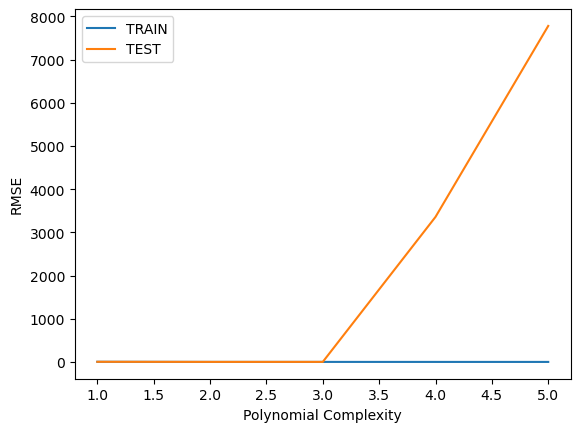

In [156]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

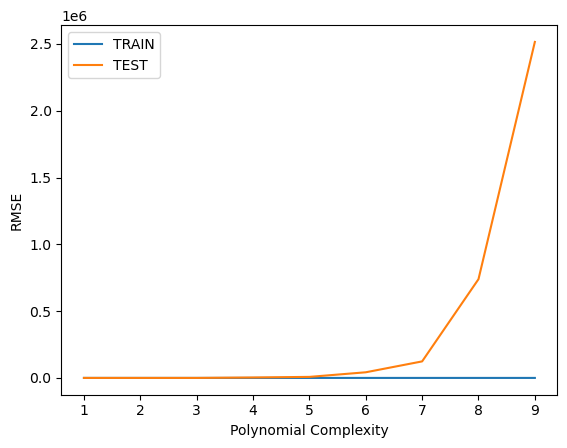

In [157]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

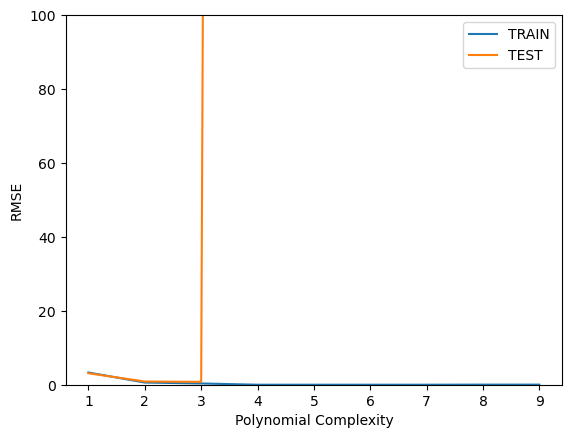

In [158]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

In [159]:
final_poly_converter = PolynomialFeatures(degree=3 ,include_bias=False)

In [160]:
final_model = LinearRegression()

In [161]:
final_model.fit(final_poly_converter.fit_transform(X), y)

LinearRegression()

In [162]:
from joblib import dump, load

In [163]:
dump(final_model, 'minimal_flow_rate_poly_model.joblib') 

['minimal_flow_rate_poly_model.joblib']

In [164]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [165]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('minimal_flow_rate_poly_model.joblib')

In [177]:
data = prepare_data(r"C:\Users\defau\ML PROJECT DIPLOMA\Данные 3\Жанаталап 282\WellPlan_Rep_215.9_Жанаталап_282.xlsx", "Мин расход по глубине")
Depth = data[['Расстояние вдоль колонны','Глубина по вертикали']]


In [178]:
minimal_flow_rate = loaded_poly.transform(Depth)

In [179]:
ans = final_model.predict(minimal_flow_rate)

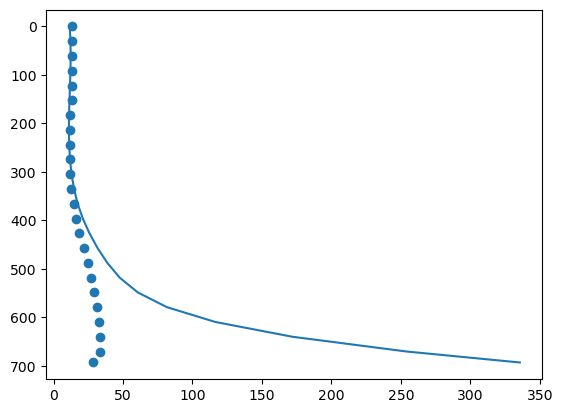

In [180]:
plt.scatter(data['Мин. расход'], data['Расстояние вдоль колонны'])

plt.plot(ans, data['Расстояние вдоль колонны'])
plt.gca().invert_yaxis()

# Вывод: при использовании полиноминальной регресси на данных, схожыми по количеству, предсказанный расход будет неверен. 

# Так же при попытке тренировки модели на разных данных, эта модель будет предсказывать только данные, которые были использованы последними. Т.е если взять два различных набора данных и последовательно их отдавать модели, то она в конечном итоге будет предсказывать только по последним данным


 # Advantages of using Polynomial Regression

    A broad range of functions can be fit under it.
    Polynomial basically fits a wide range of curvatures.
    Polynomial provides the best approximation of the relationship between dependent and independent variables.

# Disadvantages of using Polynomial Regression 

    These are too sensitive to outliers.
    The presence of one or two outliers in the data can seriously affect the results of nonlinear analysis.
    In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

# Conclusion

    Polynomial regression, a versatile tool, finds applications in diverse domains. While addressing non-linear relationships, it requires careful consideration of overfitting and model complexity.
    
# https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/